In [607]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D

In [608]:
data = pd.read_csv('auto-mpg.csv')

In [609]:
data = data.iloc[:, :7]
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
dtype: object

In [610]:
horsepower_nulls = np.nonzero(~data.horsepower.str.isdigit())[0]

In [611]:
data = data.replace('?', np.nan)

In [612]:
data['horsepower'] = data['horsepower'].fillna(data['horsepower'].astype('float64').median())

In [613]:
y = np.asanyarray(data['mpg'])
x = np.asanyarray(data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']])

In [614]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=1)

In [615]:
model = LinearRegression()

In [616]:
model.fit(x_train, y_train)

LinearRegression()

In [617]:
model.coef_

array([-0.08164013,  0.00545837, -0.0030397 , -0.0069102 ,  0.08106116,
        0.79935077])

In [618]:
model.intercept_

-18.26611021937934

In [619]:
y_pred = model.predict(x_test)

In [620]:
frame = pd.DataFrame({
    'cylinders': x_test[:, 0],
    'displacement': x_test[:, 1],
    'horsepower': x_test[:, 2],
    'weight': x_test[:, 3],
    'acceleration': x_test[:, 4],
    'model year': x_test[:, 5],
    'Real_MPG': y_test,
    'Predicted_MPG': y_pred
})

frame

,cylinders,displacement,horsepower,weight,acceleration,model year,Real_MPG,Predicted_MPG
0,6,171.0,97,2984,14.5,75,18.0,22.389226
1,4,141.0,80,3230,20.4,81,28.1,26.014885
2,8,318.0,140,3735,13.2,78,19.4,20.000728
3,5,131.0,103,2830,15.9,78,20.3,25.810002
4,6,232.0,90,3265,18.2,79,20.2,24.299026
...,...,...,...,...,...,...,...,...
75,4,90.0,75,2125,14.5,74,28.0,27.313766
76,5,121.0,67,2950,19.9,80,36.4,26.958569
77,8,318.0,145,4140,13.7,77,15.5,16.428077
78,8,351.0,148,4657,13.5,75,14.0,11.411595


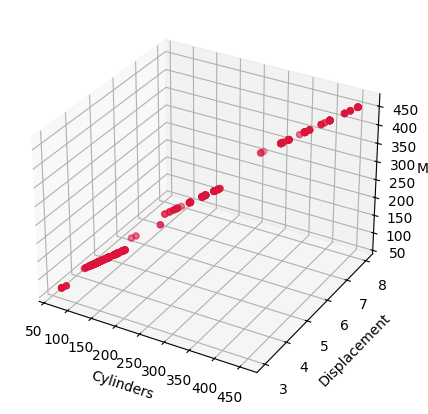

In [621]:
fig = plt.figure(figsize=(5,8))
multiple = fig.add_subplot(111, projection='3d')
multiple.scatter(x[:, 1], x[:, 0], x[:, 1], color='crimson')
multiple.set_xlabel('Cylinders')
multiple.set_ylabel('Displacement')
multiple.set_zlabel('MPG')
plt.show()